### 목표
- 타이타닐 데이터를 모델에 학습시켜서 생존/사망 예측
- 머신러닝의 전체 과정을 진행해보자

#### 1. 문제정의
- Kaggle에서 제공하는 titanic 데이터를 사용해서 승객의 생존 여부를 예측
- 지도 학습
- Survived 컬럼의 데이터값은 수치형이지만, (0,1) 생존 여부만 구분하고 있기 때문에 우선순위는 없음
- 분류

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # 시각화 도구

#### 2. 데이터 수집
- 타이타익 train 데이터와 test데이터를 변수 train, test에 저장

In [6]:
train = pd.read_csv('data/train (1).csv', index_col = 'PassengerId')
test = pd.read_csv('data/test (1).csv', index_col = 'PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [17]:
# 훈련 데이터 셋 정보 확인
train.info()
# 결측치가 있음 ( Age, Cabin, Embarked )
# 문자 > 숫자 : 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
test.info()
# 정답 데이터 (Survived) 없음
# 결측치 존재 (Age, Fare, Cabin)
# 필요시 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [25]:
# 컬럼 정보 정리
train.columns
'''
Pclass : 객실 등급 (1:상위층, 2: 중상위, 3:하위층)
Name : 이름
Sex : 성별
Age : 나이
SibSp : 형제자매/배우자(같이 탑승한)
Parch : 부모/자식(같이 탑승한)
Ticket : 티켓 번호
Fare : 요금
Cabin : 객실 번호
Embarked : 승선항 (S, C, Q)
'''

'\nPclass : 객실 등급 (1:상위층, 2: 중상위, 3:하위층)\nName : 이름\nSex : 성별\nAge : 나이\nSibSp : 형제자매/배우자(같이 탑승한)\nParch : 부모/자식(같이 탑승한)\nTicket : 티켓 번호\nFare : 요금\nCabin : 객실 번호\nEmbarked : 승선항 (S, C, Q)\n'

#### 결측치 채우기
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

In [ ]:
# 결측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법 > 삭제하는 데이터가 너무 많거나, 모델링에 치명적이지 않은 데이터이어야 함..
# 데이터가 많을수록 과대적합을 피할 수 있음. > 삭제시 데이터 양이 줄어들기 때문.

# 2. 결측치를 다른 값(대표 값)으로 대체하는 방법
# > 평균, 최빈값, 중앙값

- train - Embarked 컬럼 결측치 채우기

In [31]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
# Embarked 컬럼의 결측치는?
train['Embarked'].isnull().sum()

2

In [39]:
# 결측치가 있는 데이터 출력 ( 불리언 인덱싱 )
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [45]:
# fillna('값')
# 비어있는 데이터가 있다면, '값'으로 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [47]:
train['Embarked'].isnull().sum()

0

- test : Fare 컬럼의 결측치 채우기

In [52]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [56]:
# 상관관계 확인
test.corr(numeric_only=True) # 숫자 컬럼 포함
# 상관 계수 : -1 ~ 1 범위로 표현됨
# -1, 1에 가까울수록 해당 컬럼과의 상관관계가 높다.
# 0 에 가까울수록 상관관계가 낮다.

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [58]:
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


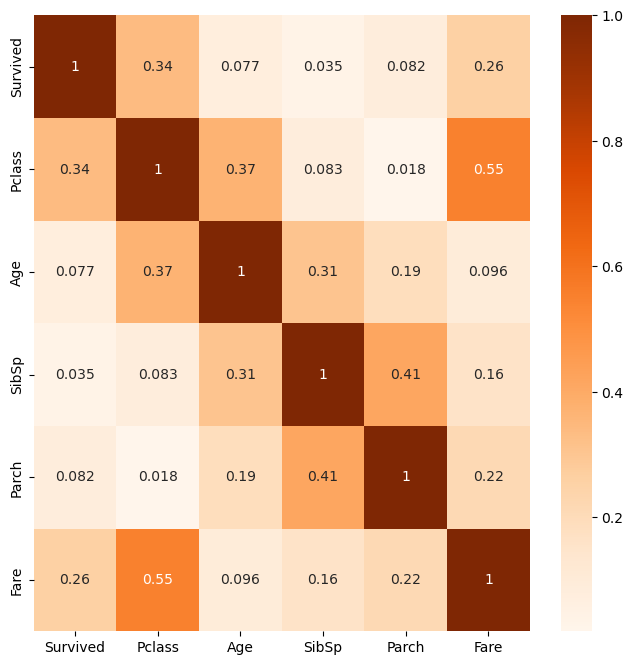

In [70]:
# 히트맵 표현
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only=True).abs(), annot = True, cmap = 'Oranges')
plt.show()

In [74]:
# train Pclass 컬럼
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [76]:
# 객실등급을 기준으로 그룹화 groupby(), 요금 컬럼 집계함수 중앙값 median()
train[['Pclass','Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [90]:
# Pclass, Sex를 기준으로 그룹핑하여 Fare의 중앙값을 확인
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [92]:
# 결측치가 있는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [94]:
test['Fare'] = test['Fare'].fillna(7.925)

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train, test Age 채우기
- 위에서 사용했던 Pclass, Sex컬럼을 그룹핑해서 Age의 집계를 확인하고 채워보자

In [101]:
# 평균값을 쓸지, 중앙값을 쓸지 판단을 위해 Age컬럼의 기술통계량을 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [105]:
# Age는 Pclass와 상관관계가 높았다.
# Pclass, Sex를 그룹핑하여 Age의 평균을 출력해보자

gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).median()
gb1

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [113]:
# gb1 - index 2개 Pclass, Sex
# 멀티인덱스
# 2등석, 남성 : 평균 나이 
gb1.loc[(2,'male')]

Age    30.0
Name: (2, male), dtype: float64

In [117]:
# train Age 결측치가 있는 행 출력
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [119]:
gb1.loc[(2,'male')]

Age    30.0
Name: (2, male), dtype: float64

In [158]:
gb1

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [160]:
# 규칙에 맞게 Pclass와 Sex에 따른 Age값을 반환하는 함수 선언
def fill_age(row):
    # row = 받아오는 행의 데이터 (매개변수)

    # 만약에 Age 컬럼이 결측치라면, gb1 테이블의 값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])]
    # 결측치가 아니라면. 원래 값을 사용
    else:
        return row['Age']

In [168]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [170]:
test['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       0 non-null      float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### 정리
- apply, fill_age를 통해
- 테스트 데이터를 행단위로 쪼갠것을 매개변수로 안쪽 로직이 동작
- 결과값으로 Age를 채울 수 있는 대표값 반환
- 정수형으로 변환한 후 train,test 'Age'컬럼에 넣어주는 작업

- train, test Cabin 채우기
- Cabin 컬럼 데이터 확인
- 임의의 값으로 결측치 채울 예정

In [150]:
# train 기준으로 데이터 확인
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',